# Rolling ball filter

- https://media.nature.com/original/nature-assets/srep/2016/160725/srep30179/extref/srep30179-s1.pdf
- https://github.com/imagej/imagej1/blob/master/ij/plugin/filter/BackgroundSubtracter.java
- http://ieeexplore.ieee.org/document/1654163/?reload=true

https://plot.ly/python/alpha-shapes/
>In a family of alpha shapes, the parameter α controls the level of detail of the associated alpha shape. If α decreases to zero, the corresponding alpha shape degenerates to the point set, S, while if it tends to infinity the alpha shape tends to the convex hull of the set S.

In [189]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import spatial

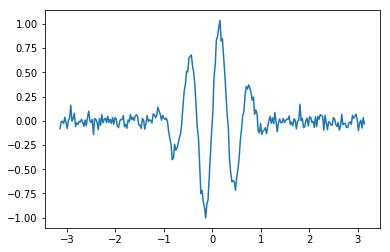

In [239]:
x= np.linspace(-1 * np.pi, 1 * np.pi, 256)
y = np.sin(10 * x)
y *= np.exp(-2 * x**2)
# y += np.poly1d(np.random.randn(3))(x) * 0.1
# y += x
y += np.random.randn(*y.shape) * 0.05
plt.plot(x, y)

In [240]:
import scipy.ndimage as ndi

/Users/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


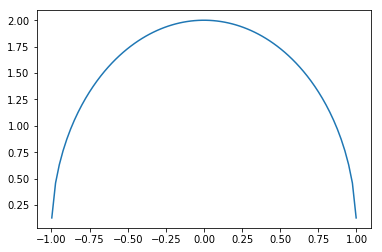

In [241]:
s = 2 * np.sqrt(1 - (x/1)**2).real
plt.plot(x, s)
s = s[np.isfinite(s)]

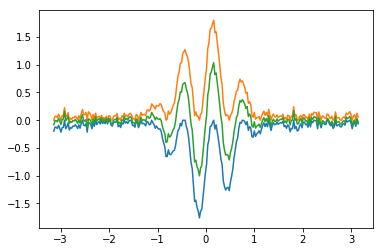

In [242]:
Yb = -ndi.black_tophat(y, structure=s)
Yw = ndi.white_tophat(y, structure=s)
plt.plot(x, Yb)
plt.plot(x, Yw)
plt.plot(x, y)

In [265]:
from scipy.ndimage._ni_support import _normalize_sequence

def rolling_ball_filter2(data, radius, spacing=None, top=False, **kwargs):
    """
    
    https://en.wikipedia.org/wiki/Top-hat_transform
    """
    ndim = data.ndim
    if spacing is None:
        spacing = np.ones_like(ndim)
    else:
        spacing = _normalize_sequence(spacing, ndim)
        
    radius = np.asarray(_normalize_sequence(radius, ndim))
    mesh = np.array(np.meshgrid(*[np.arange(-r, r + s, s) for r, s in zip(radius, spacing)], indexing="ij"))
    structure = 2 * np.sqrt(1 - ((mesh / radius.reshape(-1, *((1,) * ndim)))**2).sum(0))
    structure[~np.isfinite(structure)] = 0
#     structure = np.exp(-((mesh / radius.reshape(-1, *((1,) * ndim)))**2).sum(0))
    if not top:
        # ndi.white_tophat(y, structure=structure, output=background)
        background = ndi.grey_erosion(data, structure=structure, **kwargs)
        background = ndi.grey_dilation(background, structure=structure, **kwargs)
    else:
        # ndi.black_tophat(y, structure=structure, output=background)
        background = ndi.grey_dilation(data, structure=structure, **kwargs)
        background = ndi.grey_erosion(background, structure=structure, **kwargs)
        
    return data - background, background
    

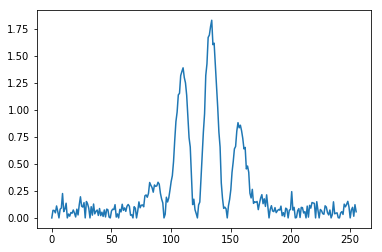

In [266]:
plt.plot(Y)

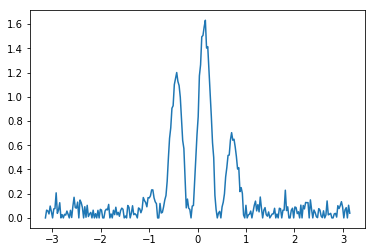

In [269]:
for i in range(1):
    Y, y_bg = rolling_ball_filter2(y + i * x, 0.5, spacing=[x[1] - x[0]])
    plt.plot(x, Y)

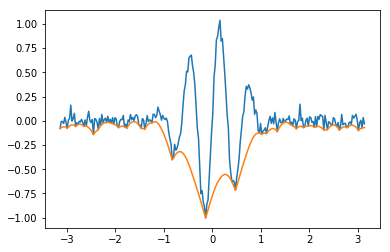

In [270]:
plt.plot(x, y + i*x)
plt.plot(x, y_bg)

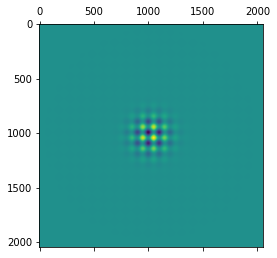

In [225]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 2048)
xx, yy = np.meshgrid(x, x)
z = np.sin(10 * xx) + np.sin(10 * yy)
z *= np.exp(-1 * (xx**2 + yy**2))
# z += (np.random.randn(6,1,1) * (xx**2, yy**2, xx * yy, xx, yy, np.ones_like(xx))).sum(0) * 0.1
plt.matshow(z)

In [226]:
x[1] - x[0]

0.006138920671401316

In [227]:
Z, z_bg = rolling_ball_filter2(z, 0.5, x[1] - x[0])

/Users/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


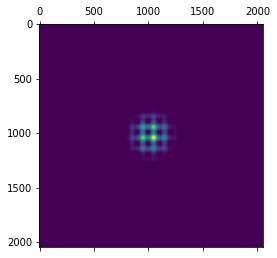

In [228]:
plt.matshow(Z)

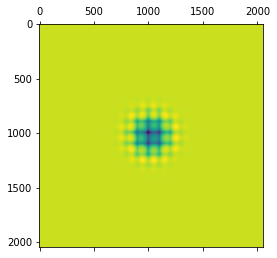

In [229]:
plt.matshow(z_bg)

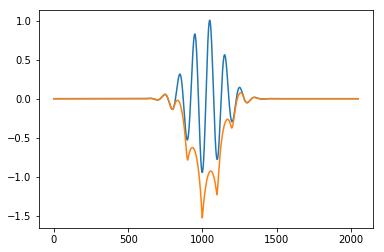

In [235]:
s=1024
plt.plot(z[s, :])
plt.plot(z_bg[s, :])

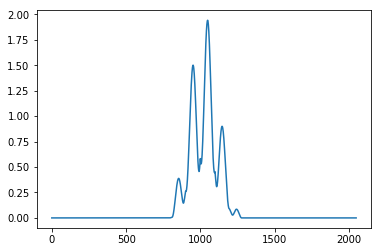

In [236]:
plt.plot(Z[s, :])

In [282]:
spacing=_normalize_sequence(0.1, 1)
radius=1
radius = np.asarray(_normalize_sequence(radius, 1))
mesh = np.array(np.meshgrid(*[np.arange(-r, r + s, s) for r, s in zip(radius, spacing)], indexing="ij"))
structure = 2 * np.sqrt(1 - ((mesh / radius.reshape(-1, *((1,) * 1)))**2).sum(0))
structure[~np.isfinite(structure)] = 0

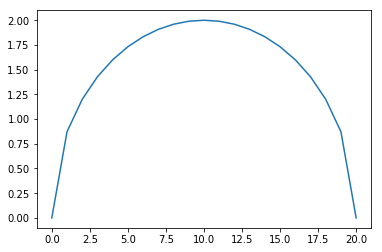

In [283]:
plt.plot(structure)

In [284]:
mesh = np.array(np.meshgrid(*[np.arange(-r, r + s, s) for r, s in zip([radius]*2, [spacing]*2)], indexing="ij"))

In [286]:
c = (mesh**2).sum(0) < 1

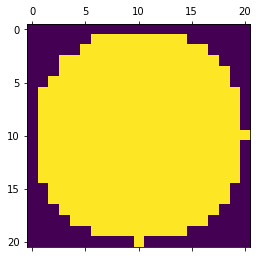

In [287]:
plt.matshow(c)

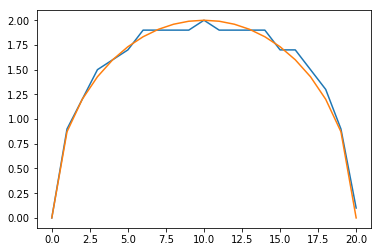

In [291]:
plt.plot(c.sum(0)/c.sum(0).max() *2)
plt.plot(structure)